In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
from pathlib import Path
import random
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# Load project directory
PROJECT_DIR = Path(os.path.abspath('../..'))

In [32]:
# Load already cleaned data from makefile command
# 20% sampled from raw dataset
# Only make and violation_description columns
df = pd.read_csv(PROJECT_DIR / 'data' / 'processed' / '2021-01-02_processed_02samp.csv', index_col=0)
df.head()

,make,violation_description
index,,
0,Honda,NO EVIDENCE OF REG
1,Toyota,PARK IN GRID LOCK ZN
2,Chrysler,NO STOP/STAND AM
3,Ford,NO PARKING
4,Honda,NO EVIDENCE OF REG


In [33]:
# Drop all missing data
df.dropna(inplace=True)

In [34]:
# Create table of violation ratio by make
def ratio_table(df, n=50):
  make_vio_dict = {}
  for make in df.make.value_counts().head(n).index:
    counts = df.loc[(df.make == make), 'violation_description'].value_counts()
    count_ratio = counts/counts.sum()
    make_vio_dict[make] = count_ratio.to_dict()
  dg = pd.DataFrame.from_dict(make_vio_dict).T.fillna(0)
  # Lets drop unknown and other car makes
  dg.drop(index=['Other', 'Unknown'], inplace=True)
  return dg

In [190]:
make_ratio = ratio_table(df, 65)

In [36]:
make_ratio.head()

,NO PARK/STREET CLEAN,METER EXP.,PREFERENTIAL PARKING,RED ZONE,DISPLAY OF TABS,NO PARKING,STOP/STAND PROHIBIT,PARKED OVER TIME LIMIT,WHITE ZONE,BLOCKING DRIVEWAY,...,BLK INT PROHIB,RESTRCTD ZONES,8755*,PARK LOT - STRT/ALY,TRAILER 6' HIGH,FRONT BUMP REQ,DISABLED PERSON,WRG SD-DUAL RWY,VIOL EMER RULES,6FT OF RR TRACK
Toyota,0.314328,0.174373,0.074730,0.070849,0.054167,0.047063,0.040396,0.034309,0.022874,0.016550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Honda,0.321157,0.159344,0.073659,0.071321,0.059172,0.045497,0.040467,0.035442,0.022655,0.017123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ford,0.295708,0.147809,0.058604,0.084200,0.065613,0.045144,0.040923,0.033573,0.019622,0.013125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nissan,0.300160,0.158608,0.067963,0.090300,0.052736,0.047597,0.041996,0.033584,0.023170,0.017618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chevrolet,0.287817,0.147738,0.055967,0.093279,0.059846,0.045918,0.040439,0.034085,0.019327,0.013947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
one_feature = make_ratio[['NO PARK/STREET CLEAN']].copy()
two_feature = make_ratio[['NO PARK/STREET CLEAN','METER EXP.']].copy()
three_feature = make_ratio[['NO PARK/STREET CLEAN','METER EXP.' ,'PREFERENTIAL PARKING']].copy()
four_feature = make_ratio[['NO PARK/STREET CLEAN','METER EXP.' ,'PREFERENTIAL PARKING', 'RED ZONE']].copy()
five_feature = make_ratio[['NO PARK/STREET CLEAN','METER EXP.' ,'PREFERENTIAL PARKING', 'RED ZONE','DISPLAY OF TABS']].copy()
six_feature = make_ratio[['NO PARK/STREET CLEAN','METER EXP.' ,'PREFERENTIAL PARKING', 'RED ZONE','DISPLAY OF TABS', 'NO PARKING']].copy()

In [183]:
luxury_list = ['Tesla','Infinity','Jaguar','BMW','Mercedes Benz','Lexus','Audi','Acura','Porsche','Bentley','Alfa Romero','Rolls-Royce','Ferrari','Land Rover', 'Maserati']
comm_list = ['Freightliner','Grumman','Isuzu','International','Peterbuilt','Kenworth','Hino',]

In [184]:
def make_cat(df):
    if df.name in luxury_list:
        return 0
    elif df.name in comm_list:
        return 1
    else:
        return 2

In [135]:
one_feature['label'] = one_feature.apply(make_cat, axis=1)
two_feature['label'] = two_feature.apply(make_cat, axis=1)
three_feature['label'] = three_feature.apply(make_cat, axis=1)
four_feature['label'] = four_feature.apply(make_cat, axis=1)
five_feature['label'] = five_feature.apply(make_cat, axis=1)
six_feature['label'] = six_feature.apply(make_cat, axis=1)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    one_feature.drop('label', axis=1), one_feature[['label']], test_size=0.33)

In [165]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.6666666666666666

In [171]:
print(cross_val_score(knn, one_feature.drop('label', axis=1), one_feature[['label']], cv=10).mean())
print(cross_val_score(knn, two_feature.drop('label', axis=1), two_feature[['label']], cv=10).mean())
print(cross_val_score(knn, three_feature.drop('label', axis=1), three_feature[['label']], cv=10).mean())
print(cross_val_score(knn, four_feature.drop('label', axis=1), four_feature[['label']], cv=10).mean())
print(cross_val_score(knn, five_feature.drop('label', axis=1), five_feature[['label']], cv=10).mean())
print(cross_val_score(knn, six_feature.drop('label', axis=1), six_feature[['label']], cv=10).mean())

0.8261904761904761
0.8571428571428573
0.8547619047619047
0.8880952380952382
0.8880952380952382
0.8880952380952382


In [167]:
from sklearn import svm
clf = svm.SVC(kernel='poly', C=1).fit(X_train, y_train)

In [168]:
print(cross_val_score(clf, one_feature.drop('label', axis=1), one_feature[['label']], cv=10).mean())
print(cross_val_score(clf, two_feature.drop('label', axis=1), two_feature[['label']], cv=10).mean())
print(cross_val_score(clf, three_feature.drop('label', axis=1), three_feature[['label']], cv=10).mean())
print(cross_val_score(clf, four_feature.drop('label', axis=1), four_feature[['label']], cv=10).mean())
print(cross_val_score(clf, five_feature.drop('label', axis=1), five_feature[['label']], cv=10).mean())
print(cross_val_score(clf, six_feature.drop('label', axis=1), six_feature[['label']], cv=10).mean())

0.7785714285714286
0.8404761904761905
0.8547619047619047
0.8571428571428573
0.8738095238095239
0.8595238095238095


In [169]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)

In [170]:
print(cross_val_score(clf, one_feature.drop('label', axis=1), one_feature[['label']], cv=10).mean())
print(cross_val_score(clf, two_feature.drop('label', axis=1), two_feature[['label']], cv=10).mean())
print(cross_val_score(clf, three_feature.drop('label', axis=1), three_feature[['label']], cv=10).mean())
print(cross_val_score(clf, four_feature.drop('label', axis=1), four_feature[['label']], cv=10).mean())
print(cross_val_score(clf, five_feature.drop('label', axis=1), five_feature[['label']], cv=10).mean())
print(cross_val_score(clf, six_feature.drop('label', axis=1), six_feature[['label']], cv=10).mean())

0.6357142857142857
0.6857142857142857
0.7523809523809524
0.7142857142857142
0.7809523809523811
0.7642857142857143


In [172]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)


In [173]:
print(cross_val_score(clf, one_feature.drop('label', axis=1), one_feature[['label']], cv=10).mean())
print(cross_val_score(clf, two_feature.drop('label', axis=1), two_feature[['label']], cv=10).mean())
print(cross_val_score(clf, three_feature.drop('label', axis=1), three_feature[['label']], cv=10).mean())
print(cross_val_score(clf, four_feature.drop('label', axis=1), four_feature[['label']], cv=10).mean())
print(cross_val_score(clf, five_feature.drop('label', axis=1), five_feature[['label']], cv=10).mean())
print(cross_val_score(clf, six_feature.drop('label', axis=1), six_feature[['label']], cv=10).mean())

0.4666666666666667
0.7595238095238096
0.8214285714285715
0.8404761904761905
0.7904761904761906
0.7880952380952382


In [174]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()


In [175]:
print(cross_val_score(clf, one_feature.drop('label', axis=1), one_feature[['label']], cv=10).mean())
print(cross_val_score(clf, two_feature.drop('label', axis=1), two_feature[['label']], cv=10).mean())
print(cross_val_score(clf, three_feature.drop('label', axis=1), three_feature[['label']], cv=10).mean())
print(cross_val_score(clf, four_feature.drop('label', axis=1), four_feature[['label']], cv=10).mean())
print(cross_val_score(clf, five_feature.drop('label', axis=1), five_feature[['label']], cv=10).mean())
print(cross_val_score(clf, six_feature.drop('label', axis=1), six_feature[['label']], cv=10).mean())

0.7809523809523811
0.8428571428571429
0.8547619047619047
0.8547619047619047
0.8547619047619047
0.8214285714285715


In [177]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
print(cross_val_score(clf, one_feature.drop('label', axis=1), one_feature[['label']], cv=10).mean())
print(cross_val_score(clf, two_feature.drop('label', axis=1), two_feature[['label']], cv=10).mean())
print(cross_val_score(clf, three_feature.drop('label', axis=1), three_feature[['label']], cv=10).mean())
print(cross_val_score(clf, four_feature.drop('label', axis=1), four_feature[['label']], cv=10).mean())
print(cross_val_score(clf, five_feature.drop('label', axis=1), five_feature[['label']], cv=10).mean())
print(cross_val_score(clf, six_feature.drop('label', axis=1), six_feature[['label']], cv=10).mean())

0.8261904761904763
0.8595238095238095
0.8547619047619047
0.9047619047619048
0.8571428571428573
0.8404761904761905


In [178]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [191]:
make_ratio['label'] = make_ratio.apply(make_cat, axis=1)

In [196]:
X = make_ratio.iloc[:, 0:189]
y = make_ratio.iloc[:, -1]
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  

                        Specs     Score
32   COMM VEH OVER TIME LIMIT  5.626994
17             DOUBLE PARKING  2.611361
3                    RED ZONE  2.133031
11          DISPLAY OF PLATES  1.952536
57        18 IN/CURB/COMM VEH  1.917875
1                  METER EXP.  1.624793
0        NO PARK/STREET CLEAN  1.587141
115       COMM TRAILER/22 FT.  0.929380
6         STOP/STAND PROHIBIT  0.881916
2        PREFERENTIAL PARKING  0.431919


In [203]:
feature = []
for feat in featureScores.nlargest(10,'Score').Specs:
    feature.append(feat)
    print(cross_val_score(knn, make_ratio[feature], make_ratio['label'], cv=10).mean())

0.7
0.6857142857142857
0.65
0.8761904761904761
0.8761904761904761
0.8904761904761905
0.9047619047619048
0.9047619047619048
0.9047619047619048
0.9047619047619048


In [205]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
feature = []
for feat in featureScores.nlargest(10,'Score').Specs:
    feature.append(feat)
    print(cross_val_score(clf, make_ratio[feature], make_ratio['label'], cv=10).mean())

0.7476190476190475
0.7166666666666666
0.7166666666666666
0.8619047619047618
0.8761904761904761
0.8761904761904761
0.8928571428571429
0.8928571428571429
0.8928571428571429
0.8928571428571429


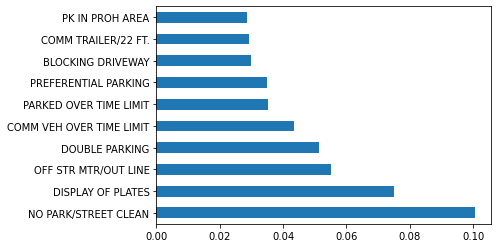

In [208]:
clf.fit(X,y)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [210]:
print(cross_val_score(clf, make_ratio[['NO PARK/STREET CLEAN']], make_ratio['label'], cv=10).mean())

0.8261904761904763


In [211]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
feature = []
for feat in featureScores.nlargest(10,'Score').Specs:
    feature.append(feat)
    print(cross_val_score(clf, make_ratio[feature], make_ratio['label'], cv=10).mean())

0.6666666666666666
0.6023809523809522
0.6857142857142857
0.8595238095238095
0.8595238095238095
0.8428571428571429
0.8904761904761903
0.9047619047619048
0.8761904761904761
0.8928571428571429


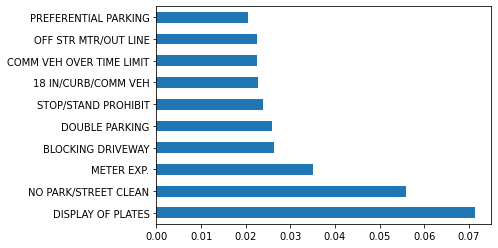

In [212]:
clf.fit(X,y)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [227]:
knn = KNeighborsClassifier(n_neighbors=5)
feature = []
for feat in make_ratio.iloc[:,:8]:
    feature.append(feat)
    print(cross_val_score(knn, make_ratio[feature], make_ratio['label'], cv=10).mean())

0.8261904761904761
0.8571428571428573
0.8547619047619047
0.8880952380952382
0.8880952380952382
0.8880952380952382
0.8738095238095239
0.8738095238095239


In [215]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
feature = []
for feat in make_ratio.iloc[:,:8]:
    feature.append(feat)
    print(cross_val_score(clf, make_ratio[feature], make_ratio['label'], cv=10).mean())

0.8261904761904763
0.8595238095238095
0.8547619047619047
0.9047619047619048
0.8571428571428573
0.8404761904761905
0.9071428571428571
0.8428571428571427


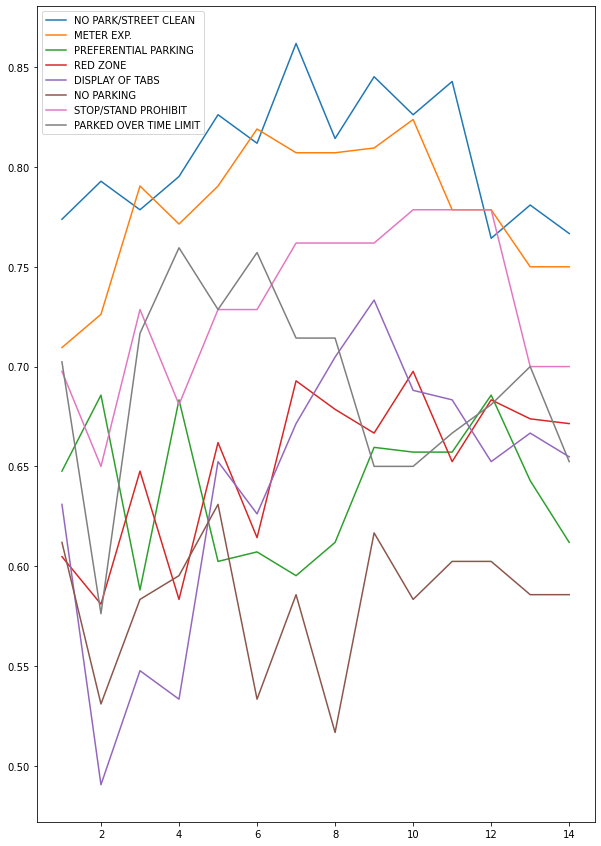

In [240]:
plt.figure(figsize=(10,15))
for feat in feature:
    clist = []
    for cluster in range(1,15):
        knn = KNeighborsClassifier(n_neighbors=cluster)
        clist.append(cross_val_score(knn, make_ratio[[feat]], make_ratio['label'], cv=10).mean())
    plt.plot(range(1,15),clist, label=feat)
plt.legend()
plt.show()


In [237]:
feature

['NO PARK/STREET CLEAN',
 'METER EXP.',
 'PREFERENTIAL PARKING',
 'RED ZONE',
 'DISPLAY OF TABS',
 'NO PARKING',
 'STOP/STAND PROHIBIT',
 'PARKED OVER TIME LIMIT']

In [247]:
test_table = ratio_table(df, 80)

In [249]:
C.tail(15)

,NO PARK/STREET CLEAN,METER EXP.,PREFERENTIAL PARKING,RED ZONE,DISPLAY OF TABS,NO PARKING,STOP/STAND PROHIBIT,PARKED OVER TIME LIMIT,WHITE ZONE,BLOCKING DRIVEWAY,...,BLK INT PROHIB,RESTRCTD ZONES,8755*,PARK LOT - STRT/ALY,TRAILER 6' HIGH,FRONT BUMP REQ,DISABLED PERSON,WRG SD-DUAL RWY,VIOL EMER RULES,6FT OF RR TRACK
Daewoo,0.329502,0.107280,0.030651,0.049808,0.141762,0.019157,0.080460,0.034483,0.019157,0.022989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lamborghini,0.109091,0.213636,0.045455,0.081818,0.027273,0.045455,0.022727,0.018182,0.054545,0.004545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mack,0.119760,0.095808,0.047904,0.119760,0.095808,0.089820,0.077844,0.011976,0.005988,0.005988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MERK,0.211679,0.262774,0.087591,0.051095,0.065693,0.029197,0.043796,0.014599,0.036496,0.007299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IND,0.214286,0.230159,0.055556,0.150794,0.047619,0.031746,0.055556,0.039683,0.015873,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Auburn,0.230000,0.250000,0.120000,0.110000,0.020000,0.030000,0.030000,0.020000,0.030000,0.020000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bugatti,0.259740,0.285714,0.038961,0.051948,0.038961,0.064935,0.038961,0.025974,0.025974,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CIMC,0.000000,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EGLE,0.339623,0.075472,0.000000,0.037736,0.150943,0.037736,0.056604,0.018868,0.018868,0.018868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tioga,0.000000,0.000000,0.000000,0.038462,0.000000,0.019231,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [254]:
knn = KNeighborsClassifier(n_neighbors=7)
feature = []
for feat in make_ratio.iloc[:,:8]:
    feature.append(feat)
    print(cross_val_score(knn, make_ratio[feature], make_ratio['label'], cv=10).mean())

0.8619047619047618
0.8404761904761905
0.8547619047619047
0.8738095238095239
0.8738095238095239
0.8738095238095239
0.8738095238095239
0.8880952380952382


In [268]:
knn.fit(make_ratio[['NO PARK/STREET CLEAN']], make_ratio['label'])

KNeighborsClassifier(n_neighbors=7)

In [269]:
accuracy_score([2,0,0,0,], knn.predict(test_table.loc[['Daewoo','Lamborghini', 'Bugatti','Fisker' ], ['NO PARK/STREET CLEAN']]))

0.75

In [270]:
knn.predict(test_table.loc[['Daewoo','Lamborghini', 'Bugatti','Fisker' ], ['NO PARK/STREET CLEAN']])

array([2, 0, 2, 0])

In [252]:
test_table.loc[['Daewoo','Lamborghini', 'Bugatti','Fisker' ], feature]

,NO PARK/STREET CLEAN,METER EXP.,PREFERENTIAL PARKING,RED ZONE,DISPLAY OF TABS,NO PARKING,STOP/STAND PROHIBIT,PARKED OVER TIME LIMIT
Daewoo,0.329502,0.107280,0.030651,0.049808,0.141762,0.019157,0.080460,0.034483
Lamborghini,0.109091,0.213636,0.045455,0.081818,0.027273,0.045455,0.022727,0.018182
Bugatti,0.259740,0.285714,0.038961,0.051948,0.038961,0.064935,0.038961,0.025974
Fisker,0.187500,0.312500,0.062500,0.000000,0.000000,0.031250,0.031250,0.000000
